In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 1. Load Data
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/mellyapp_dataset_OLAP.csv")

In [2]:
df.head()

,stu_id,course_id,gender,age,total_activities,total_duration_minutes,quiz_count,individual_assignment_count,group_assignment_count,forum_count,grade
0,1,2,0,23,1,10.0,0,0,0,1,80
1,2,1,1,23,3,108.0,0,4,2,0,93
2,2,2,1,23,3,74.0,2,0,2,1,56
3,2,3,1,23,3,65.0,0,2,2,1,54
4,2,4,1,23,3,109.0,0,2,3,2,62


In [3]:
df.columns

Index(['stu_id', 'course_id', 'gender', 'age', 'total_activities',
       'total_duration_minutes', 'quiz_count', 'individual_assignment_count',
       'group_assignment_count', 'forum_count', 'grade'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stu_id                       479 non-null    int64  
 1   course_id                    479 non-null    int64  
 2   gender                       479 non-null    int64  
 3   age                          479 non-null    int64  
 4   total_activities             479 non-null    int64  
 5   total_duration_minutes       479 non-null    float64
 6   quiz_count                   479 non-null    int64  
 7   individual_assignment_count  479 non-null    int64  
 8   group_assignment_count       479 non-null    int64  
 9   forum_count                  479 non-null    int64  
 10  grade                        479 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 41.3 KB


In [6]:
df.isnull().sum()

stu_id                         0
course_id                      0
gender                         0
age                            0
total_activities               0
total_duration_minutes         0
quiz_count                     0
individual_assignment_count    0
group_assignment_count         0
forum_count                    0
grade                          0
dtype: int64

In [7]:
X = df.drop('grade', axis=1)
y = df['grade']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 4. Grid Search (opsional → bisa langsung pakai default jika mau simple)
param_grid = {
    'model__n_estimators': [100],
    'model__max_depth': [3],
    'model__learning_rate': [0.1]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# 5. Evaluasi
y_pred = grid.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost RMSE: 15.21


In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Dataset
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/mellyapp_dataset_OLAP.csv")

# 2. Pisahkan fitur dan label
X = df.drop('grade', axis=1)
y = df['grade']

# 3. Clustering (Unsupervised Learning)
# Step 1: scaling sebelum clustering
scaler_for_cluster = StandardScaler()
X_scaled = scaler_for_cluster.fit_transform(X)

# Step 2: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 3: Tambahkan hasil clustering ke data sebagai fitur baru
X['cluster'] = cluster_labels

# 4. Split data untuk supervised learning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Pipeline untuk regresi
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 6. Grid Search parameter (opsional bisa ditambah)
param_grid = {
    'model__n_estimators': [100],
    'model__max_depth': [3],
    'model__learning_rate': [0.1]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# 7. Evaluasi model
y_pred = grid.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("=== Evaluation Results ===")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 8. (Opsional) Simpan model
# import joblib
# joblib.dump(grid.best_estimator_, 'xgboost_hybrid_model.pkl')


=== Evaluation Results ===
RMSE: 15.27
R² Score: -0.0422


=== Classification Report ===
              precision    recall  f1-score   support

           A       0.21      0.20      0.21        30
           B       0.20      0.16      0.18        19
           C       0.19      0.21      0.20        19
           D       0.25      0.29      0.27        28

    accuracy                           0.22        96
   macro avg       0.21      0.21      0.21        96
weighted avg       0.22      0.22      0.22        96



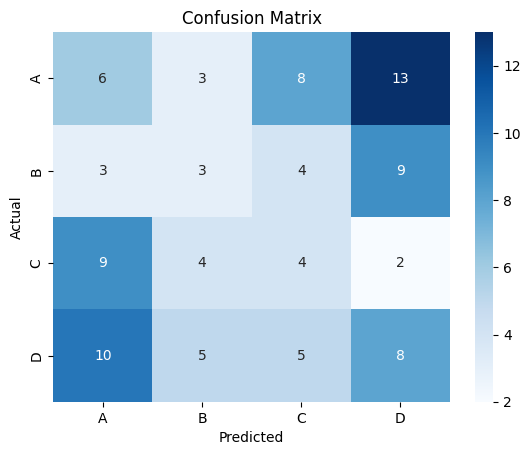

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/mellyapp_dataset_OLAP.csv")

# 2. Mapping Grade ke Huruf A/B/C/D
def grade_to_letter(g):
    if g >= 85:
        return 'A'
    elif g >= 75:
        return 'B'
    elif g >= 65:
        return 'C'
    else:
        return 'D'

df['grade_letter'] = df['grade'].apply(grade_to_letter)

# 3. Siapkan Fitur dan Target
X = df.drop(columns=['grade', 'grade_letter'])
y = df['grade_letter']

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Pipeline ML
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 6. Training
pipe.fit(X_train, y_train)

# 7. Prediksi
y_pred = pipe.predict(X_test)

# 8. Evaluasi
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C', 'D'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'], cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, classification_report

# 1. Load Dataset
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/mellyapp_dataset_OLAP.csv")

# 2. Split Fitur dan Target
X = df.drop('grade', axis=1)
y = df['grade']

# 3. Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Buat Pipeline Regressor
reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 5. Fit ke data training
reg_pipeline.fit(X_train, y_train)

# 6. Prediksi nilai numerik
y_pred_reg = reg_pipeline.predict(X_test)

# 7. Mapping fungsi dari nilai ke huruf
def map_grade_to_letter(grade):
    if grade >= 85:
        return 'A'
    elif grade >= 75:
        return 'B'
    elif grade >= 65:
        return 'C'
    else:
        return 'D'

# 8. Konversi y asli dan prediksi ke huruf
y_test_letter = y_test.apply(map_grade_to_letter)
y_pred_letter = pd.Series(y_pred_reg).apply(map_grade_to_letter)

# 9. Evaluasi Regresi
rmse = mean_squared_error(y_test, y_pred_reg) ** 0.5
print(f"=== Evaluation (Regression) ===")
print(f"RMSE: {rmse:.2f}")

# 10. Evaluasi Klasifikasi berdasarkan mapping
print("\n=== Evaluation (Grade Letter Classification from Regression) ===")
print(classification_report(y_test_letter, y_pred_letter))


=== Evaluation (Regression) ===
RMSE: 17.34

=== Evaluation (Grade Letter Classification from Regression) ===
              precision    recall  f1-score   support

           A       0.27      0.12      0.17        32
           B       0.24      0.50      0.33        18
           C       0.22      0.44      0.29        16
           D       0.33      0.13      0.19        30

    accuracy                           0.25        96
   macro avg       0.27      0.30      0.24        96
weighted avg       0.28      0.25      0.23        96



In [12]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, classification_report

# 1. Load Dataset
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/mellyapp_dataset_OLAP.csv")

# 2. Features & Target
X = df.drop('grade', axis=1)
y = df['grade']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Pipeline dengan GridSearch
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid.fit(X_train, y_train)

# 5. Evaluation - Regression
y_pred = grid.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"=== Evaluation (Regression) ===")
print(f"RMSE: {rmse:.2f}")

# 6. Mapping Nilai → Grade Huruf
def map_to_letter(grade):
    if grade >= 85:
        return 'A'
    elif grade >= 75:
        return 'B'
    elif grade >= 65:
        return 'C'
    else:
        return 'D'

y_test_letter = y_test.apply(map_to_letter)
y_pred_letter = pd.Series(y_pred).apply(map_to_letter)

# 7. Evaluation - Grade Classification
print("\n=== Evaluation (Grade Letter Classification from Regression) ===")
print(classification_report(y_test_letter, y_pred_letter))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
=== Evaluation (Regression) ===
RMSE: 15.11

=== Evaluation (Grade Letter Classification from Regression) ===
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        32
           B       0.21      0.61      0.31        18
           C       0.21      0.56      0.31        16
           D       0.00      0.00      0.00        30

    accuracy                           0.21        96
   macro avg       0.11      0.29      0.16        96
weighted avg       0.08      0.21      0.11        96



d:\1.UNI 5th Semester\6. Advance DataBase\ADVANCE_DB PROJECT\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1.UNI 5th Semester\6. Advance DataBase\ADVANCE_DB PROJECT\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1.UNI 5th Semester\6. Advance DataBase\ADVANCE_DB PROJECT\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from xgboost import XGBRegressor

# Load data
df = pd.read_csv('D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/OLAP_DATASET.csv')

# Fitur dan target
X = df[['gender', 'age', 'total_activities', 'total_duration', 'activity_type']]
y = df['grade']

# Pisahkan fitur kategorikal dan numerikal
categorical_features = ['gender', 'activity_type']
numeric_features = ['age', 'total_activities', 'total_duration']

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Buat pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Regression Metrics ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Simpan model
# joblib.dump(model, 'xgboost_grade_model.pkl')
# print("Model saved as 'xgboost_grade_model.pkl'")


=== Regression Metrics ===
Mean Squared Error (MSE): 255.20
R-squared (R²): -0.14
Model saved as 'xgboost_grade_model.pkl'


In [19]:
import pandas as pd

df = pd.read_csv('D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/OLAP_DATASET.csv')
print(df.columns.tolist())


['stu_id', 'course_id', 'gender', 'age', 'total_activities', 'total_duration', 'activity_type', 'grade']
